# K-Means Cluster Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



Data contains 11 variables for 307 universities.  
  
Read universities.csv into dataframe.  
Set CollegeName column to dataframe index.

In [3]:
data = pd.read_csv('universities.csv')
data = data.set_index('CollegeName')
data

,MathSAT,VerbalSAT,Applications,AcceptanceRate,FTUndergrad,PTUndergrad,InStateTuition,OutOfStateTuition,PercentFacultyPHD,StudentFacultyRatio,GraduationRate
CollegeName,,,,,,,,,,,
Northern Arizona University,495,444,5891,0.84,11249,2682,16828,21746,78,21.7,0.41
University of Arizona,526,462,14079,0.87,21664,4894,16828,22434,91,19.6,0.49
California Polytechnic-San Luis,547,455,7811,0.49,12911,1404,17033,22380,72,19.8,0.59
Westmont College,550,501,950,0.75,1276,9,29320,29320,77,14.9,0.87
Mesa State College,451,400,1584,0.92,3471,911,16434,20016,48,28.8,0.59
...,...,...,...,...,...,...,...,...,...,...,...
Hampden - Sydney College,564,517,817,0.79,945,1,28218,28218,95,13.3,0.69
Hampton University,475,442,7178,0.52,4623,740,22161,22161,60,14.0,0.70
Randolph-Macon College,533,483,1771,0.75,1071,27,28840,28840,77,10.7,0.74


Use StandardScaler to standardize data.  Each column in data_scaled will have mean = 0 and variance = 1.  
Feature standardization is an important consideration when modeling using an algorithm based on distances between points (such as k-means).

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled, columns = data.columns)

,MathSAT,VerbalSAT,Applications,AcceptanceRate,FTUndergrad,PTUndergrad,InStateTuition,OutOfStateTuition,PercentFacultyPHD,StudentFacultyRatio,GraduationRate
0,-0.469301,-0.566609,0.532991,0.762975,1.408574,0.994195,-1.386526,-0.974048,0.231657,1.991430,-1.386712
1,-0.004300,-0.261584,2.343358,0.956130,3.411143,2.235466,-1.386526,-0.805517,1.032819,1.439890,-0.945722
2,0.310701,-0.380205,0.957503,-1.490506,1.728139,0.277042,-1.349021,-0.818745,-0.138111,1.492417,-0.394485
3,0.355702,0.399303,-0.559464,0.183508,-0.509008,-0.505767,0.898903,0.881259,0.170029,0.205491,1.148980
4,-1.129304,-1.312226,-0.419286,1.278056,-0.086959,0.000393,-1.458609,-1.397824,-1.617179,3.856160,-0.394485
...,...,...,...,...,...,...,...,...,...,...,...
302,0.565702,0.670437,-0.588870,0.441049,-0.572652,-0.510256,0.697290,0.611316,1.279330,-0.214730,0.156753
303,-0.769302,-0.600501,0.817547,-1.297351,0.134544,-0.095564,-0.410846,-0.872390,-0.877645,-0.030884,0.211876
304,0.100701,0.094278,-0.377941,0.183508,-0.548425,-0.495666,0.811086,0.763680,0.170029,-0.897589,0.432371
305,-0.034300,0.026495,-0.347208,-0.009647,-0.424599,-0.451335,0.662895,0.565264,0.293284,0.100436,0.983609


Use KMeans from sklearn.cluster and **fit()** method to compute k-means cluster model.

In [5]:
kmeans = KMeans(n_clusters = 3, n_init = 10, max_iter = 100)
kmeans.fit(data_scaled)

KMeans(max_iter=100, n_clusters=3, n_init=10)

Attribute **cluster_centers_** is array of coordinates of cluster centers.  
We can interpret these coordinates as the "average" member of cluster i.

In [6]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=data.columns)
centers

,MathSAT,VerbalSAT,Applications,AcceptanceRate,FTUndergrad,PTUndergrad,InStateTuition,OutOfStateTuition,PercentFacultyPHD,StudentFacultyRatio,GraduationRate
0,0.155225,-0.101540,1.140988,-0.431728,1.451769,1.056938,-1.208267,-0.826945,0.516319,0.747026,-0.399735
1,1.021266,1.084182,-0.003298,-0.408980,-0.268039,-0.364672,1.076337,1.186897,0.745453,-0.713152,0.883271
2,-0.649496,-0.581259,-0.461863,0.410310,-0.436167,-0.220202,-0.126923,-0.345396,-0.637893,0.105858,-0.344696


Transforming back into original units.

In [7]:
centers_orig = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = data.columns)
centers_orig

,MathSAT,VerbalSAT,Applications,AcceptanceRate,FTUndergrad,PTUndergrad,InStateTuition,OutOfStateTuition,PercentFacultyPHD,StudentFacultyRatio,GraduationRate
0,536.634921,471.444444,8640.873016,0.654444,11473.650794,2793.809524,17802.349206,22346.523810,82.619048,16.961905,0.589048
1,594.370787,541.415730,3465.449438,0.657978,2529.235955,260.438202,30289.842697,30567.719101,86.337079,11.402247,0.821798
2,482.987097,443.135484,1391.432258,0.785226,1654.832258,517.890323,23712.903226,24312.374194,63.890323,14.520645,0.599032


Coordinates of cluster centers visualized as bar plot.

<Axes: title={'center': 'Cluster Means'}>

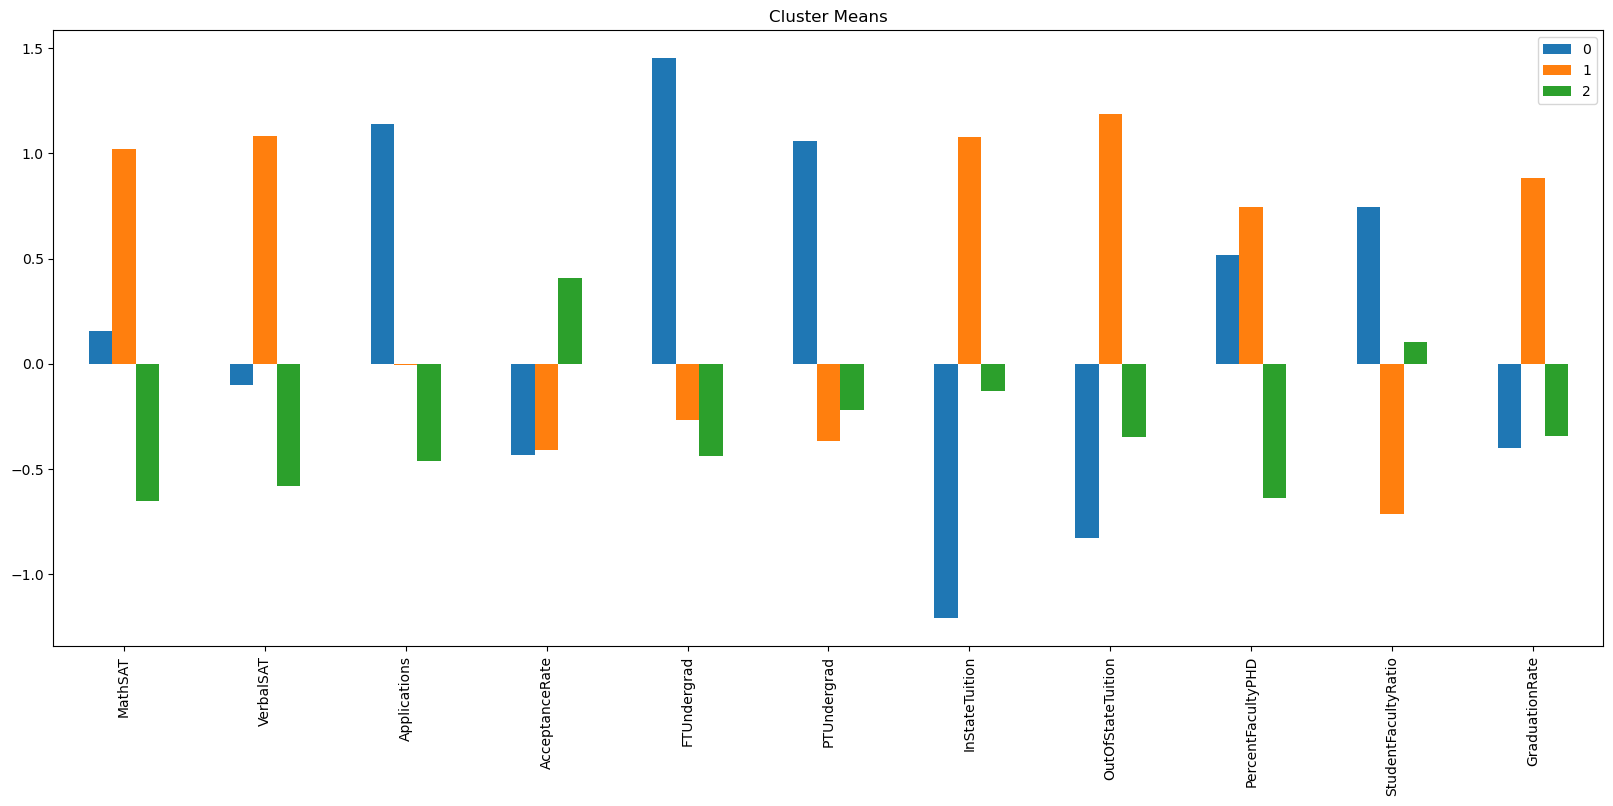

In [8]:
centers.transpose().plot(kind = "bar", figsize = (20,8), title = "Cluster Means")

Attribute **labels_** is array of cluster assignment for each row in original data set.

In [9]:
kmeans.labels_

array([0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,

In [10]:
data['cluster'] = kmeans.labels_
data

,MathSAT,VerbalSAT,Applications,AcceptanceRate,FTUndergrad,PTUndergrad,InStateTuition,OutOfStateTuition,PercentFacultyPHD,StudentFacultyRatio,GraduationRate,cluster
CollegeName,,,,,,,,,,,,
Northern Arizona University,495,444,5891,0.84,11249,2682,16828,21746,78,21.7,0.41,0
University of Arizona,526,462,14079,0.87,21664,4894,16828,22434,91,19.6,0.49,0
California Polytechnic-San Luis,547,455,7811,0.49,12911,1404,17033,22380,72,19.8,0.59,0
Westmont College,550,501,950,0.75,1276,9,29320,29320,77,14.9,0.87,1
Mesa State College,451,400,1584,0.92,3471,911,16434,20016,48,28.8,0.59,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Hampden - Sydney College,564,517,817,0.79,945,1,28218,28218,95,13.3,0.69,1
Hampton University,475,442,7178,0.52,4623,740,22161,22161,60,14.0,0.70,2
Randolph-Macon College,533,483,1771,0.75,1071,27,28840,28840,77,10.7,0.74,1


Method **predict()** returns the cluster to which any data point (in sample or out of sample) belongs.

In [11]:
new_university = [ 0.20570105, -0.00739655,  0.23030552,  0.95613019,  1.71256462, 0.4195744 , -1.37536564, -1.31943751,  0.60142368,  0.31054601, -1.00084595]
new_university = np.array(new_university).reshape(1, -1)

kmeans.predict(new_university)

array([0])

A scatter plot of the data, color coded by cluster membership, on 2 of the 11 dimensions.

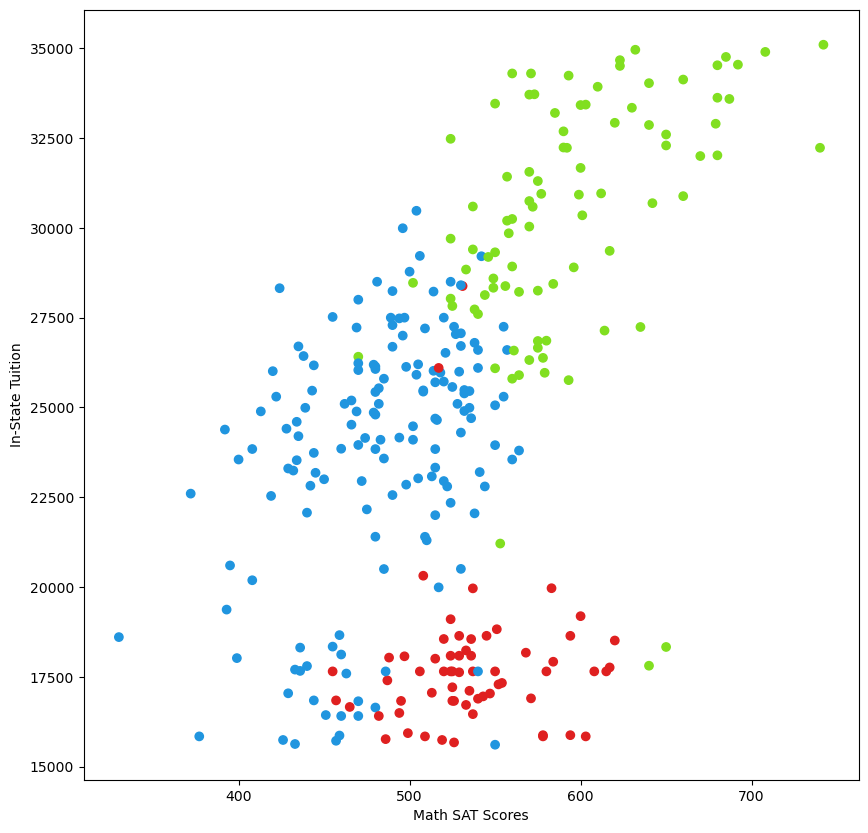

In [12]:
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.figure(figsize = (10,10))
plt.scatter(data.MathSAT, data.InStateTuition, c = data.c)
plt.xlabel('Math SAT Scores')
plt.ylabel('In-State Tuition')
plt.show()


Three example universities and the clusters to which they belong.

In [13]:
data.loc[['Dartmouth College', 'University of Texas at Austin', 'Houghton College']]

,MathSAT,VerbalSAT,Applications,AcceptanceRate,FTUndergrad,PTUndergrad,InStateTuition,OutOfStateTuition,PercentFacultyPHD,StudentFacultyRatio,GraduationRate,cluster,c
CollegeName,,,,,,,,,,,,,
Dartmouth College,692,627,8587,0.27,3918,32,34545,34545,95,4.7,0.98,1,#81DF20
University of Texas at Austin,603,523,14752,0.65,30017,5189,15840,20130,91,19.7,0.65,0,#DF2020
Houghton College,535,508,949,0.83,1210,26,24990,24990,85,15.0,0.67,2,#2095DF


Assessing the number of clusters.  
Method 1: plot of within-cluster sum of squared distances by # of clusters.

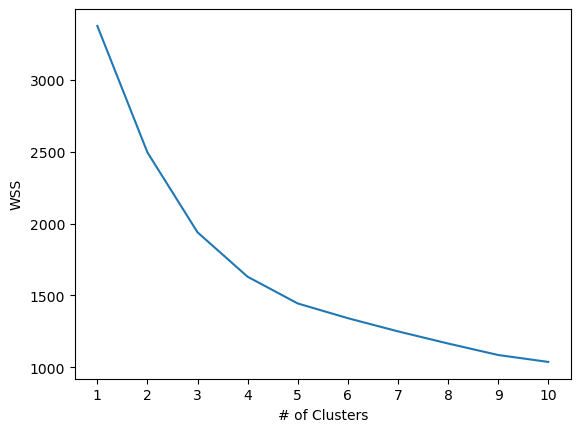

In [14]:
kmeans_args = {"n_init" : 10, "max_iter": 100}

wss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_args)
  kmeans.fit(data_scaled)
  wss.append(kmeans.inertia_)

plt.plot(range(1,11), wss)
plt.xticks(range(1,11))
plt.xlabel("# of Clusters")
plt.ylabel("WSS")
plt.show()

Method 2: plot of silhoette score by number of clusters.

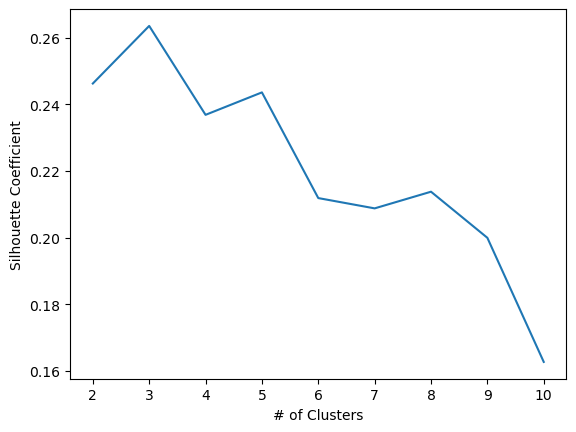

In [15]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []


for k in range(2,11):
  kmeans = KMeans(n_clusters = k, **kmeans_args)
  kmeans.fit(data_scaled)
  score = silhouette_score(data_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()